In [1]:
# for creating a responsive plot
# %matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import csv
from datetime import datetime
from os import mkdir, listdir

import pandas as pd

In [3]:
# -------- range of the variables ----------
range_D     = [0.5, 0.8]
range_AEdAO = [0.3, 1.05]
range_PdD   = [0.5, 1.4]
range_Z     = [2, 7]

In [4]:
dir_name = 'gradient_join'
V_Ss = ['7_0', '7_5', '8_0']

In [5]:
dfs_vs = {}   # dict of (dicts for df by z) for each V_S
for V_S in V_Ss:
    dir_name = 'gradients/'+V_S
    dfs = {} # dicts for df by z
    for filename in listdir(dir_name):
        z = int(filename[0])
        filename = dir_name+'/'+filename
        df = pd.read_csv(filename)
        # select only the collums
        # D, AEdAO, PdD, P_B
        df = df.iloc[:, [0,1,2,4]]
        df = df.set_axis(["D", "AEdAO", "PdD", "P_B"], axis=1)
        # select the non null power brake
        df = df.loc[df['P_B'] > 0]
        df = df.astype(float)
        dfs[z] = df
    dfs_vs[V_S] = dfs

In [6]:
dfs_vs['7_0'][4]

,D,AEdAO,PdD,P_B
140,0.593103,1.050000,0.732759,110.296562
141,0.593103,1.050000,0.706897,110.515755
231,0.593103,1.031034,0.706897,110.276659
408,0.610345,1.050000,0.784483,107.630304
409,0.610345,1.050000,0.758621,107.586090
...,...,...,...,...
25165,0.705172,0.708621,0.603448,92.111398
25166,0.705172,0.708621,0.577586,92.570653
25285,0.687931,0.746552,0.603448,94.577040
25286,0.687931,0.746552,0.577586,95.117385


In [7]:
print('Amount of valid solutions found for each Z')

for vs in dfs_vs:
    print(vs)
    dfs = dfs_vs[vs]
    for z in dfs:
        print(' ', z, len(dfs[z]))

Amount of valid solutions found for each Z
7_0
  5 4858
  2 4577
  6 4840
  3 4722
  7 4355
  4 4834
7_5
  5 3068
  2 2792
  6 3118
  3 2913
  7 2438
  4 3021
8_0
  6 162
  4 122


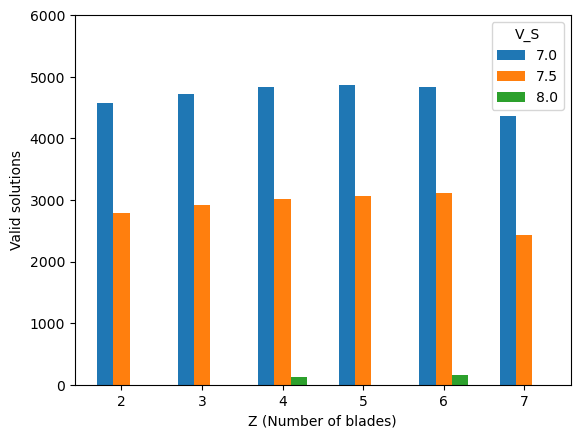

In [34]:
# create data
x = np.arange(6)
vs = '7_0'
y1 = [len(dfs_vs[vs][z]) if (z in dfs_vs[vs]) else 0 for z in range(2,8)]
vs = '7_5'
y2 = [len(dfs_vs[vs][z]) if (z in dfs_vs[vs]) else 0 for z in range(2,8)]
vs = '8_0'
y3 = [len(dfs_vs[vs][z]) if (z in dfs_vs[vs]) else 0 for z in range(2,8)]
width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x, y2, width)
plt.bar(x+0.2, y3, width)
plt.xticks(x, [str(z) for z in range(2,8)])
plt.xlabel("Z (Number of blades)")
plt.ylabel("Valid solutions")
plt.legend(["7.0", "7.5", "8.0"], title='V_S')
plt.ylim(0,6000)
plt.show()
